# CR[_tbx2_]F&empty; plots after quantification in Napari.ipynb

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import zscore
import pygal
import math
import IPython
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import colorsys
import importlib
import svgutils
from svgutils.compose import *
import os.path
from cmcrameri import cm #colormaps

In [2]:
batlow = cm.vik(range(255))
batlow = batlow[0:255:np.int(np.floor(255/8)),:]
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler(color=batlow) 

#gene Colors
zfC = {
    'R'  : '#7d7d7d',
    'U' : '#B73AB9',
    'S' : '#4364F6',
    'M' : '#59CB3B',
    'L' : '#CE2A22',
}

zfG = {
    'wt' : '#000000',
    'tbx2a' : '#ab266b',
    'tbx2b' : '#421f8e',
    'foxq2' : '#001dd6',
}

zfGm = {
    'wt' : 'o',
    'tbx2a' : 'P',
    'tbx2b' : 'X',
    'foxq2' : '^',
}

def formatFigureMain(figH, axH, plotH):
    font_path = '/System/Library/Fonts/Avenir.ttc'
    fontTicks = font_manager.FontProperties(fname=font_path, size=18)
    fontLabels = font_manager.FontProperties(fname=font_path, size=22)
    fontTitle = font_manager.FontProperties(fname=font_path, size=28)
    axH.set_xscale('linear')
    axH.spines['top'].set_visible(False)
    axH.spines['right'].set_visible(False)
    
    for label in (axH.get_xticklabels() + axH.get_yticklabels()):
        label.set_fontproperties(fontTicks)
    axH.set_xlabel(axH.get_xlabel(), fontproperties = fontTicks)
    axH.set_ylabel(axH.get_ylabel(), fontproperties = fontTicks)
    return fontLabels

def formatFigureRU(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
#     axH.set_xlabel('wt vs. cr', fontproperties=fontLabels)
    axH.set_ylabel('cells per 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

def formatFigureRvU(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('Rods per 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('UV cones per 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)
    
def formatFigureMvS(figH, axH, plotH):
    fontLabels = formatFigureMain(figH, axH, plotH)
    axH.set_xlabel('M cones per 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.set_ylabel('S cones per 64 $\mu$m$^2$', fontproperties=fontLabels)
    axH.xaxis.set_tick_params(rotation=45)

    
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import colorsys
    try:
        c = matplotlib.colors.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*matplotlib.colors.to_rgb(c))
    return matplotlib.colors.rgb2hex(colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2]))

In [ ]:
# dark background
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "w"}
plt.rcParams.update(params)

In [3]:
# white background
params = {"ytick.color" : "k",
          "xtick.color" : "k",
          "axes.labelcolor" : "k",
          "axes.edgecolor" : "k",
         "axes.linewidth" : 3,
         "xtick.major.width" : 3,
         "ytick.major.width" : 3,
         "xtick.major.size" : 8,
         "ytick.major.size" : 8,
         "text.color" : "k"}
plt.rcParams.update(params)

In [4]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/"
fName = "CRtbx2F0s_RU.csv"
fName = "CRtbx2F0s_RU_includingHaileyData.csv"

df = pd.read_csv(dPath + fName)
# df[df['CRgene']=='wt']
df

,filename,CRgene,R,U
0,20201113_5dpf_xOG_s1mCh_uninjected_i06b,wt,11,120
1,20201113_5dpf_xOG_s1mCh_uninjected_i12b,wt,19,146
2,20201113_5dpf_xOG_s1mCh_uninjected_i12d,wt,19,194
3,20201113_5dpf_xOG_s1mCh_uninjected_i13b,wt,15,195
4,20201113_5dpf_xOG_s1mCh_uninjected_i15b,wt,31,223
...,...,...,...,...
63,20210514_5dpf_xOG_s1C_CRfoxq2_L03b,foxq2,45,131
64,20210514_5dpf_xOG_s1C_CRfoxq2_L04b,foxq2,26,143
65,20210514_5dpf_xOG_s1C_CRfoxq2_L06b,foxq2,30,130
66,20210514_5dpf_xOG_s1C_CRfoxq2_L07b,foxq2,26,145


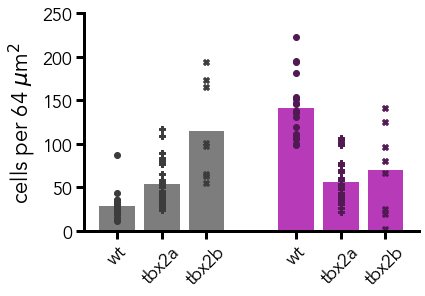

In [12]:
# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b']
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots()

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

formatFigureRU(fH, axH, pH)
axH.set_xticks(barpos);

axH.set_xticklabels(['wt','wt','tbx2a','tbx2a','tbx2b','tbx2b']);
axH.set_ylim([0,250]);
plt.savefig(dPath + "CRtbx2F0_RUa.svg", transparent=True, format="svg")

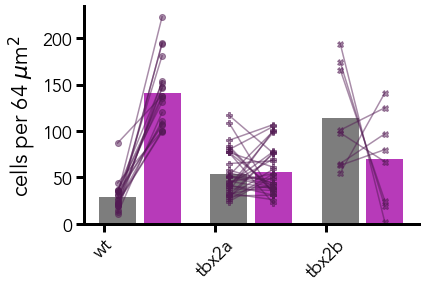

In [9]:
# geneList = ['wt','tbx2a','tbx2b','foxq2']
geneList = ['wt','tbx2a','tbx2b']
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots()

relW = np.size(geneList)+0;relD = np.size(geneList)-.5;relP = -np.size(geneList)+2;
j=relP;
barpos = []
for pr in photoreceptors:
    i=0;
    j=j+1;
    for gene in geneList:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
#         pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

i=0;
nGenes = len(geneList);
for gene in geneList:
    for l in range(0,len(df[df['CRgene']==gene])):
        pH = plt.plot((barpos[0+i],barpos[nGenes+i]), (df[(df['CRgene']==gene)]['R'].iloc[l],df[(df['CRgene']==gene)]['U'].iloc[l]), color=lighten_color(zfC[pr],1.5), alpha=0.5, zorder=2, marker = zfGm[gene]);
    i = i+1;
        
formatFigureRU(fH, axH, pH)
# axH.set_xticks(barpos); axH.set_xticklabels(['R','R','R','UV','UV','UV']);
# axH.set_xticks([0.875,1.875,2.875,3.875]); axH.set_xticklabels(geneList);
axH.set_xticks([0.875,1.875,2.875]); axH.set_xticklabels(geneList);
plt.savefig(dPath + "CRtbx2F0_RUb.svg", transparent=True, format="svg")

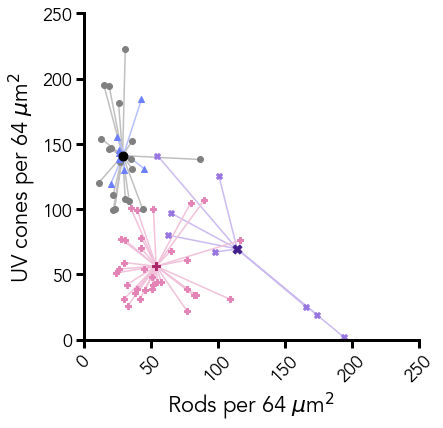

In [10]:
geneList = ['wt','tbx2a','tbx2b']
photoreceptors = ['R','U']

plotname = ''
fH, axH = plt.subplots(figsize=[6,6])

for l in range(0,len(df)):
    pH = plt.scatter(df.iloc[l,]['R'],df.iloc[l,]['U'], color = lighten_color(zfG[df.iloc[l,]['CRgene']],0.5), marker = zfGm[df.iloc[l,]['CRgene']]);
    pH = plt.plot((df.iloc[l,]['R'],np.mean(df[(df['CRgene']==df.iloc[l,]['CRgene'])]['R'])),
                  (df.iloc[l,]['U'],np.mean(df[(df['CRgene']==df.iloc[l,]['CRgene'])]['U'])), 
                  color = lighten_color(zfG[df.iloc[l,]['CRgene']],0.25), zorder = 0);
for gene in geneList:
    pH = plt.scatter(np.mean(df[(df['CRgene']==gene)]['R']), np.mean(df[(df['CRgene']==gene)]['U']), color=zfG[gene], marker = zfGm[gene], s=80, zorder=3);

formatFigureRvU(fH, axH, pH)
# axH.set_xticks(barpos);
# axH.set_xticklabels(['wt','wt','tbx2a','tbx2a','tbx2b','tbx2b']);
axH.set_xlim([0,250]);
axH.set_ylim([0,250]);
plt.savefig(dPath + "CRtbx2F0_RvU.svg", transparent=True, format="svg")

In [ ]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRfoxq2F0/"
fName = "CRfoxq2ResultsData210628temp.csv"

df = pd.read_csv(dPath + fName)
# df[df['CRgene']=='wt']
df

In [ ]:
geneList = ['wt','foxq2']
photoreceptors = ['M','S']

plotname = ''
fH, axH = plt.subplots()

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

formatFigureRU(fH, axH, pH)
axH.set_xticks(barpos);

axH.set_xticklabels(['wt','wt','foxq2','foxq2']);
axH.set_ylim([0,300]);
plt.savefig(dPath + "CRfoxq2F0_MSa.svg", transparent=True, format="svg")

In [ ]:
geneList = ['wt','foxq2']
photoreceptors = ['M','S']


plotname = ''
fH, axH = plt.subplots()

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for pr in photoreceptors:
    i=0;
    j=j+1;
    for gene in geneList:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

i=0;
for gene in geneList:
    for l in range(0,len(df[df['CRgene']==gene])):
        pH = plt.plot((barpos[0+i],barpos[2+i]), (df[(df['CRgene']==gene)]['M'].iloc[l],df[(df['CRgene']==gene)]['S'].iloc[l]), color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
    i = i+1;
        
formatFigureRU(fH, axH, pH)
# axH.set_xticks(barpos); axH.set_xticklabels(['R','R','R','UV','UV','UV']);
axH.set_ylim([0,300]);
axH.set_xticks([1.175,2.175]); axH.set_xticklabels(geneList);
plt.savefig(dPath + "CRfoxq2F0_MSb.svg", transparent=True, format="svg")

In [ ]:
geneList = ['wt','foxq2']
photoreceptors = ['M','S']

plotname = ''
fH, axH = plt.subplots(figsize=[6,6])

for l in range(0,len(df)):
    pH = plt.scatter(df.iloc[l,]['M'],df.iloc[l,]['S'], color = lighten_color(zfG[df.iloc[l,]['CRgene']],0.5), marker = zfGm[df.iloc[l,]['CRgene']]);
    pH = plt.plot((df.iloc[l,]['M'],np.mean(df[(df['CRgene']==df.iloc[l,]['CRgene'])]['M'])),
                  (df.iloc[l,]['S'],np.mean(df[(df['CRgene']==df.iloc[l,]['CRgene'])]['S'])), 
                  color = lighten_color(zfG[df.iloc[l,]['CRgene']],0.25), zorder = 0);
for gene in geneList:
    pH = plt.scatter(np.mean(df[(df['CRgene']==gene)]['M']), np.mean(df[(df['CRgene']==gene)]['S']), color=zfG[gene], marker = zfGm[gene], s=80, zorder=3);

formatFigureMvS(fH, axH, pH)
# axH.set_xticks(barpos);
# axH.set_xticklabels(['wt','wt','tbx2a','tbx2a','tbx2b','tbx2b']);
axH.set_xlim([0,300]);
axH.set_ylim([0,300]);
plt.savefig(dPath + "CRfoxq2F0_MvS.svg", transparent=True, format="svg")

### For Hailey's poster

In [ ]:
geneList = ['wt','tbx2a','foxq2']
photoreceptors = ['R']

plotname = ''
fH, axH = plt.subplots(figsize=[8,6])

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

formatFigureRU(fH, axH, pH)
axH.set_xticks(barpos);

axH.set_xticklabels(['wt','tbx2a','foxq2']);
axH.set_ylim([0,250]);
plt.savefig(dPath + "Hailey_R.png", transparent=True, format="png")

In [ ]:
geneList = ['wt','tbx2a','foxq2']
photoreceptors = ['U']

plotname = ''
fH, axH = plt.subplots(figsize=[8,6])

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

formatFigureRU(fH, axH, pH)
axH.set_xticks(barpos);

axH.set_xticklabels(['wt','tbx2a','foxq2']);
axH.set_ylim([0,250]);
plt.savefig(dPath + "Hailey_UV.png", transparent=True, format="png")

In [ ]:
dPath = "/Users/angueyraaristjm/Documents/LiImaging/Analysis/CRtbx2F0s/"
fName = "CRtbx2F0s_RU.csv"
fName = "CRtbx2F0s_MS_forHailey.csv"

df = pd.read_csv(dPath + fName)
# df[df['CRgene']=='wt']
df


In [ ]:
geneList = ['wt','tbx2a','foxq2']
photoreceptors = ['S']

plotname = ''
fH, axH = plt.subplots(figsize=[8,6])

relW = np.size(geneList)+2;relD = np.size(geneList)+1;relP = -np.size(geneList)+1;
j=relP;
barpos = []
for gene in geneList:
    i=0;
    j=j+1;
    for pr in photoreceptors:
        i = i+1;
        pH = plt.bar([i+j/relD], np.mean(df[(df['CRgene']==gene)][pr]), width=1/relW, color=zfC[pr]);
        pH = plt.scatter(np.ones(len(df[(df['CRgene']==gene)][pr]))*[i+j/relD], df[(df['CRgene']==gene)][pr], color=lighten_color(zfC[pr],1.5), zorder=2, marker = zfGm[gene]);
        barpos = np.append(barpos,(i+j/relD))

formatFigureRU(fH, axH, pH)
axH.set_xticks(barpos);

axH.set_xticklabels(['wt','tbx2a','foxq2']);
axH.set_ylim([0,250]);
plt.savefig(dPath + "Hailey_S.png", transparent=True, format="png")